In [7]:
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt
import numpy as np

from micrograd import Value
from nn import MLP

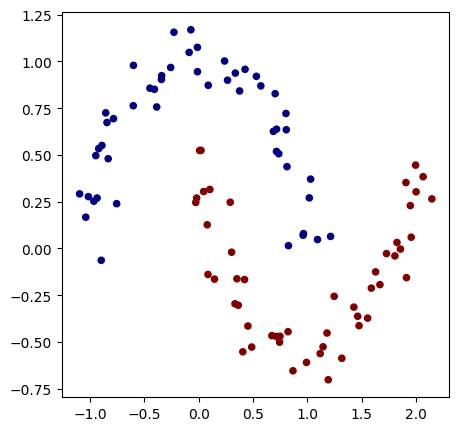

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [3]:
m = MLP(2,[16,16,1])

for k in range(100):
    scores = [m(xi) for xi in X]
    loss = sum([(1 - si*yi).relu() for si,yi in zip(scores,y)]) * 1 / len(y)
    reg_loss = 1e-4 * sum([p*p for p in m.parameters()])
    total_loss = loss + reg_loss
    accuracy = sum([(si*yi).data > 0 for si,yi in zip(scores,y)]) / len(y)
    m.zero_grad()
    total_loss.backward()
    lr = 1 - 0.9 * k / 100
    for p in m.parameters():
        p.data -= p.grad * lr
        
    print(loss, accuracy*100)
    

Value(data=1.3992748936178885) 50.0
Value(data=3.2283089795726494) 50.0
Value(data=0.8917641094398665) 50.0
Value(data=0.45834751819653763) 76.0
Value(data=0.41864586084493605) 78.0
Value(data=0.365202669311536) 83.0
Value(data=0.33371799891569137) 84.0
Value(data=0.3097105086538058) 84.0
Value(data=0.2887982801604094) 86.0
Value(data=0.2791057929198448) 85.0
Value(data=0.28182437085048034) 86.0
Value(data=0.283742058943355) 87.0
Value(data=0.2787747099697432) 89.0
Value(data=0.27096569033843876) 87.0
Value(data=0.2419913222375504) 89.0
Value(data=0.24618993397911104) 90.0
Value(data=0.21930292016871727) 91.0
Value(data=0.21226055224098822) 92.0
Value(data=0.18453816380568727) 93.0
Value(data=0.1775196725826487) 92.0
Value(data=0.14461207370350748) 95.0
Value(data=0.12445048165098306) 94.0
Value(data=0.11606421907090096) 96.0
Value(data=0.15564309068284282) 92.0
Value(data=0.07672634844029734) 98.0
Value(data=0.11344569415654168) 97.0
Value(data=0.39866308152817576) 87.0
Value(data=0.4

(-1.7025457812208313, 2.0474542187791687)

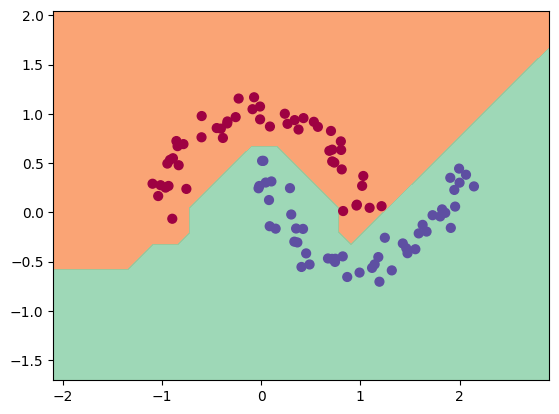

In [8]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(m, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())